In [1]:
import torch
from torch import nn
from torch.optim import SGD

from torch.utils.data import Dataset,DataLoader

import matplotlib.pyplot as plt
import numpy as np

In [2]:
class ToyDataset(Dataset):
    def __init__(self):
        self.x = torch.linspace(-8,8,steps=40,dtype=torch.float32).view((-1,1))
        self.y = torch.zeros(size=self.x.size())
        self.y[(self.x[:,0] <4) & (self.x[:,0]>-4),0] = 1
        self.y = self.y.type(torch.FloatTensor)
        
        self.length = self.x.shape[0]
        
    def __getitem__(self,index):
        sample = self.x[index],self.y[index]
        return sample
        
    def __len__(self):
        return self.length

In [3]:
batch_size = 1
dataset = ToyDataset()
dataloader = DataLoader(dataset,batch_size=batch_size)

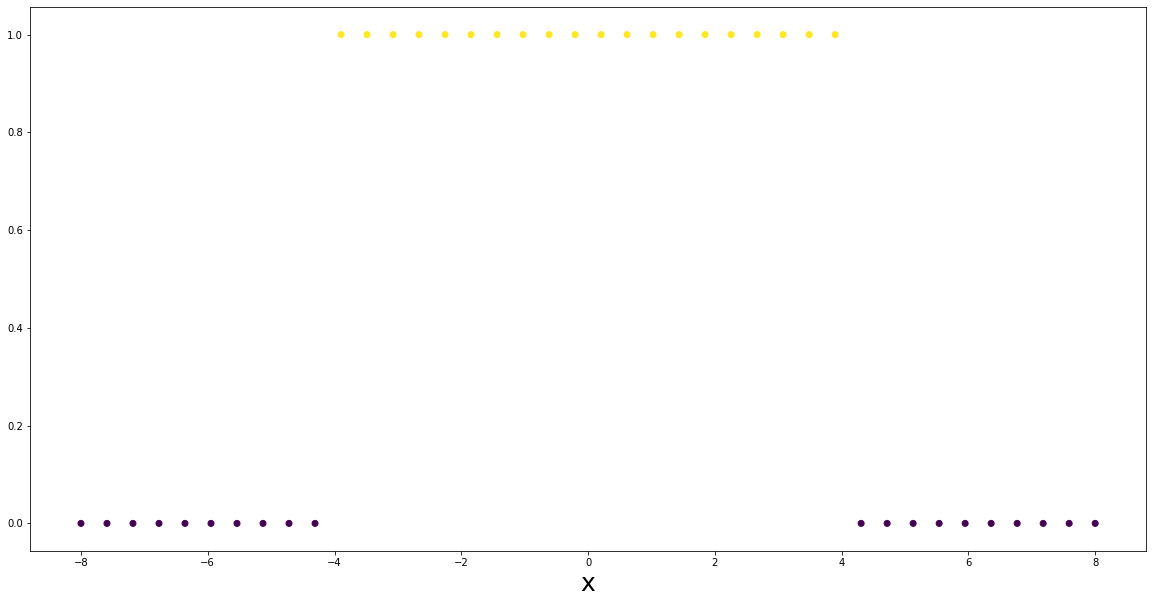

In [4]:
plt.figure(figsize=(20,10))
plt.scatter(dataset.x.detach().numpy(),dataset.y.detach().numpy(),c = dataset.y.detach().numpy())
plt.xlabel("x",fontsize=25)
plt.show()

In [5]:
class NeuralNetwork(nn.Module):
    def __init__(self,D_in,H,D_out):
        super(NeuralNetwork,self).__init__()
        self.l1 = nn.Linear(D_in,H)
        self.l2 = nn.Linear(H,D_out)
        
        self.a1 = None
        
    def forward(self,x):
        self.a1 = torch.sigmoid(self.l1(x))
        y = torch.sigmoid(self.l2(self.a1))
        return y

In [6]:
D_in = 1;
H = 2;
D_out = 1;

model = NeuralNetwork(D_in,H,D_out)

In [7]:
lr = .05
optimizer = SGD(model.parameters(),lr=lr)

In [8]:
criterion = nn.BCELoss()

In [9]:
num_epochs = 3000
print_every = 250

for epoch in range(num_epochs):
    mean_loss = []
    for x,y in dataloader:
        y_pred = model(x)
        loss = criterion(y_pred.type(torch.FloatTensor),y.squeeze(1))
        
        mean_loss.append(loss.detach().item())
        
        optimizer.zero_grad()
        
        loss.backward()
        
        optimizer.step()
    if (epoch+1) % print_every == 0:
        print("Epoch {}: loss={}".format(epoch+1,np.mean(mean_loss)))

C:\Users\lpott\Anaconda3\lib\site-packages\torch\nn\modules\loss.py:498: UserWarning: Using a target size (torch.Size([1])) that is different to the input size (torch.Size([1, 1])) is deprecated. Please ensure they have the same size.
  return F.binary_cross_entropy(input, target, weight=self.weight, reduction=self.reduction)


Epoch 250: loss=0.11216829530894756
Epoch 500: loss=0.0879383821389638
Epoch 750: loss=0.07578468469437212
Epoch 1000: loss=0.049697620153892785
Epoch 1250: loss=0.02822977181058377
Epoch 1500: loss=0.019225798794650473
Epoch 1750: loss=0.014469952341460156
Epoch 2000: loss=0.011546610824007075
Epoch 2250: loss=0.009573853822803357
Epoch 2500: loss=0.008155952308152336
Epoch 2750: loss=0.0070904994106967935
Epoch 3000: loss=0.006261656472997856


In [10]:
with torch.no_grad():
    y_pred = model(dataset.x)
    accuracy = ((y_pred > .5).type(torch.FloatTensor).squeeze() == dataset.y.squeeze()).type(torch.FloatTensor).mean()
    print("Accuracy={}".format(accuracy*100))

Accuracy=100.0


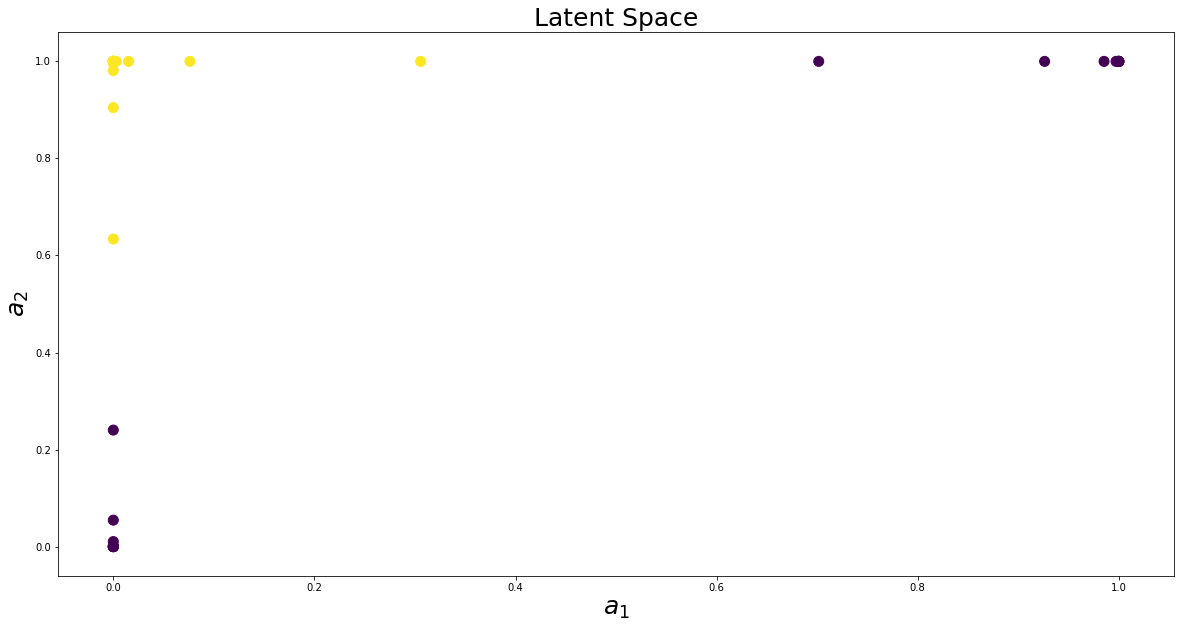

In [15]:
plt.figure(figsize=(20,10))
plt.scatter(model.a1[:,0].detach().tolist(),model.a1[:,1].detach().tolist(),c=dataset.y.squeeze().detach().tolist(),s=100)
plt.xlabel('$a_1$',fontsize=25)
plt.ylabel('$a_2$',fontsize=25)
plt.title("Latent Space",fontsize=25)
plt.show()

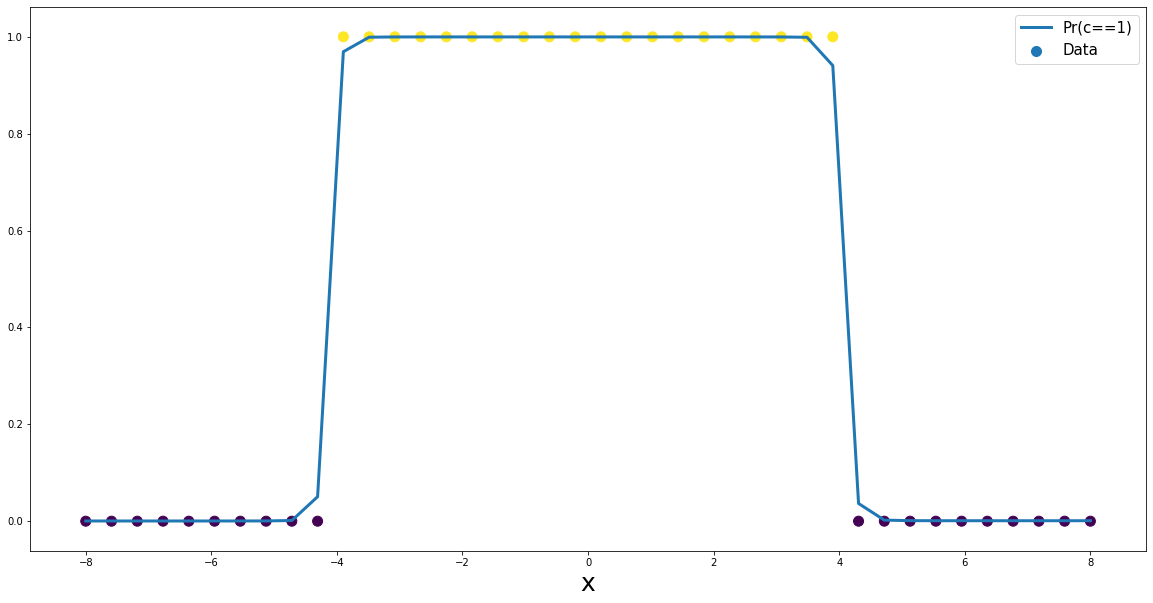

In [16]:
plt.figure(figsize=(20,10))
plt.plot(dataset.x.detach().numpy(),y_pred.detach().numpy(),label="Pr(c==1)",linewidth=3)
plt.scatter(dataset.x.detach().numpy(),dataset.y.detach().numpy(),c = dataset.y.detach().numpy(),label="Data",s=100)
plt.xlabel("x",fontsize=25)
plt.legend(fontsize=15)
plt.show()